# Sentiment Analysis

In [1]:
import pandas as pd

dfs = []
filenames = ['viktor_tsoy_lyrics', 'alisa_lyrics', 'ddt_lyrics', 'mashina_vremeni_lyrics', 
            'vysotskiy_lyrics']

for filename in filenames:
    df_clean = pd.read_pickle(f"data/{filename}.pkl")
    dfs.append(df_clean)

df_clean = pd.concat(dfs)
df_clean.reset_index(inplace=True, drop=True)
print(df_clean.info())
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  775 non-null    object
 1   title   775 non-null    object
 2   lyrics  775 non-null    object
 3   id      775 non-null    object
dtypes: object(4)
memory usage: 24.3+ KB
None


,artist,title,lyrics,id
0,Виктор Цой,Звезда по имени солнце,"\nбелый снег, серый лед\nна растрескавшейся зе...",viktor_tsoy_zvezda_po_imeni_solntse
1,Виктор Цой,Свечи ярко горят,"\nсеверный ветер\nтихо ветви колышет,\nмаленьк...",viktor_tsoy_svechi_jarko_gorjat
2,Виктор Цой,Мама мы все тяжело больны,"\nзерна упали в землю, зерна просят дождя.\nим...",viktor_tsoy_mama_my_vse_tjazhelo_bolny
3,Виктор Цой,Спокойная ночь,"\nкрыши домов дрожат под тяжестью дней,\nнебес...",viktor_tsoy_spokojnaja_noch
4,Виктор Цой,Мое настроение,"\nты пишешь мне, что обидно и некуда слезы дев...",viktor_tsoy_moe_nastroenie


In [2]:
print(f"Artists in the df : {set(df_clean.artist.values)}")

Artists in the df : {'Виктор Цой', 'ДДТ', 'Алиса', 'Машина времени', 'Высоцкий'}


In [3]:
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel
import py.io

def get_model(tokenizer):
    capture = py.io.StdCaptureFD(out=False, in_=False)
    model = FastTextSocialNetworkModel(tokenizer=tokenizer)
    out, err = capture.reset()
    # Handle err here...
    return model


def get_sentiment_words(tokens, model):
    
    words = [w for w, _ in tokens]

    results = model.predict(words, k=1)
    word_sentiments = []
    for word, sentiment in zip(words, results):

        if [k for k in sentiment.keys()][0] in ['speech', 'skip']:
            continue

        word_sentiments.append((word, sentiment))
        
    return word_sentiments

tokenizer = RegexTokenizer()
model     = get_model(tokenizer)

from collections import Counter

counter = 0
for idx in df_clean.index:
    header_printed = False
    
    song_info = df_clean.loc[idx]    
    text      = song_info['lyrics']
    tokens    = tokenizer.split(text)
    
    sentiments = get_sentiment_words(tokens, model)
    dict_sentiment_count = Counter([[*sentiment[1]][0] for sentiment in sentiments])
    df_clean.loc[idx, 'positive'] = dict_sentiment_count.get('positive', 0)
    df_clean.loc[idx, 'neutral']  = dict_sentiment_count.get('neutral', 0)
    df_clean.loc[idx, 'negative'] = dict_sentiment_count.get('negative', 0)
    
    for word, sentiment in sentiments:
        
        if [*sentiment.keys()][0] != 'neutral':
            
            if not header_printed:
                header_printed = True
                counter += 1
                print(f"\n\n{counter:>3}. {song_info['artist']} - {song_info['title']}")
            
            print(f'{word}  - {sentiment}')



  1. Виктор Цой - Звезда по имени солнце
лекарство  - {'negative': 0.2689514458179474}
красная-красная  - {'positive': 0.9931061863899231}
земля  - {'negative': 0.3998216390609741}
любим  - {'positive': 0.8872146010398865}
умирать  - {'negative': 0.8031837940216064}
опаленный  - {'negative': 0.21734751760959625}


  2. Виктор Цой - Свечи ярко горят
почему  - {'negative': 0.4301573634147644}
почему  - {'negative': 0.4301573634147644}
молодую  - {'positive': 0.2814156115055084}
вечно  - {'positive': 0.19194278120994568}


  3. Виктор Цой - Спокойная ночь
спокойная  - {'positive': 0.07586817443370819}
спокойная  - {'positive': 0.07586817443370819}
спокойная  - {'positive': 0.07586817443370819}
уснуть  - {'negative': 0.4378334879875183}
спокойная  - {'positive': 0.07586817443370819}


  4. Виктор Цой - Мое настроение
обидно  - {'negative': 0.9921941161155701}
обида  - {'negative': 0.982567548751831}
нетерпимо  - {'positive': 0.7606606483459473}
плечо  - {'positive': 0.15611489117145538}




 43. Виктор Цой - На улицах танки
хочу  - {'positive': 1.0000100135803223}
жаль  - {'negative': 0.9525841474533081}
хочу  - {'positive': 1.0000100135803223}
солнечный  - {'positive': 0.9688661694526672}
хочу  - {'positive': 1.0000100135803223}
солнечный  - {'positive': 0.9688661694526672}
хочу  - {'positive': 1.0000100135803223}
солнечный  - {'positive': 0.9688661694526672}
хочу  - {'positive': 1.0000100135803223}
солнечный  - {'positive': 0.9688661694526672}


 44. Виктор Цой - Фильмы
вперед  - {'positive': 0.9637899398803711}


 45. Алиса - Небо славян
оленя  - {'negative': 0.46102678775787354}
земля  - {'negative': 0.3998216390609741}
земля  - {'negative': 0.3998216390609741}
земля  - {'negative': 0.3998216390609741}


 46. Алиса - Трасса Е-95
досталась  - {'positive': 0.348655104637146}
досталась  - {'positive': 0.348655104637146}
досталась  - {'positive': 0.348655104637146}


 47. Алиса - Красное на черном
порой  - {'positive': 0.23935934901237488}
поднимало  - {'positive': 0.29

 86. Алиса - Танцевать
радостно  - {'positive': 0.812877357006073}
земля  - {'negative': 0.3998216390609741}
земля  - {'negative': 0.3998216390609741}
земля  - {'negative': 0.3998216390609741}
радугу  - {'positive': 0.9124462008476257}
дарили  - {'positive': 0.3775506913661957}
дарили  - {'positive': 0.3775506913661957}


 87. Алиса - Черная метка
лучше  - {'positive': 0.3998216390609741}
хуже  - {'negative': 0.7371681928634644}
земля  - {'negative': 0.3998216390609741}
смех  - {'positive': 0.754925012588501}


 88. Алиса - Солнце встает
красные  - {'positive': 0.9579222798347473}
огонь  - {'positive': 0.8558611869812012}
сулили  - {'negative': 0.7931159734725952}


 89. Алиса - Левша
нательный  - {'positive': 0.9511522054672241}
земля  - {'negative': 0.3998216390609741}
смерть  - {'negative': 0.8519628047943115}


 90. Алиса - Ветер перемен
болен  - {'negative': 0.771853506565094}
хочу  - {'positive': 1.0000100135803223}
пожара  - {'positive': 0.16886694729328156}
огонь  - {'positive'

131. Алиса - Арифметика
огонь  - {'positive': 0.8558611869812012}
предательство  - {'positive': 0.26285186409950256}
любовь  - {'positive': 0.3276783227920532}
чудо  - {'positive': 1.0000100135803223}
жесть  - {'negative': 0.4765896201133728}


132. Алиса - Пляс Сибири
хой-да-да-хой-да  - {'negative': 0.3276783227920532}
хой-да-да-хой-да  - {'negative': 0.3276783227920532}
хой-да-да-хой-да  - {'negative': 0.3276783227920532}
хой-да-да-хой-да  - {'negative': 0.3276783227920532}
хватит  - {'negative': 0.9763205647468567}


133. Алиса - Театр
счастлив  - {'positive': 0.9566442370414734}
смех  - {'positive': 0.754925012588501}


134. Алиса - Война
смерть  - {'negative': 0.8519628047943115}
наконечник  - {'positive': 0.9362950325012207}
красным  - {'positive': 0.8031837940216064}
радостью  - {'positive': 0.546748161315918}
зачерпнуть  - {'negative': 0.7879412174224854}


135. Алиса - Эй, ты, там, на том берегу
хочу  - {'positive': 1.0000100135803223}
хочу  - {'positive': 1.0000100135803223}



174. Алиса - Песня Без Слов
весна  - {'positive': 0.7310686111450195}


175. Алиса - Республика
хорошее  - {'positive': 0.994098961353302}


176. Алиса - Моя война с текстом
худое  - {'negative': 0.13297423720359802}
позор  - {'negative': 0.6442351341247559}
смерть  - {'negative': 0.8519628047943115}
смерть  - {'negative': 0.8519628047943115}
зависть  - {'negative': 0.320831298828125}
дребедень  - {'positive': 0.1097157895565033}
краснобаи  - {'positive': 0.29422497749328613}
смерть  - {'negative': 0.8519628047943115}
смерть  - {'negative': 0.8519628047943115}
дураком  - {'negative': 0.3629792034626007}
дураках  - {'negative': 0.4532718360424042}
смерть  - {'negative': 0.8519628047943115}
смерть  - {'negative': 0.8519628047943115}
вспышка  - {'positive': 0.1067005917429924}
краснобаи  - {'positive': 0.29422497749328613}
смерть  - {'negative': 0.8519628047943115}
смерть  - {'negative': 0.8519628047943115}


177. Алиса - Манекен
холит  - {'negative': 0.523430347442627}
восторг  - {'pos

218. Алиса - Отход на север
красном  - {'positive': 0.6584275364875793}
жесть  - {'negative': 0.4765896201133728}
мечты  - {'positive': 0.21734751760959625}
жаль  - {'negative': 0.9525841474533081}
красное  - {'positive': 0.91965252161026}
хочу  - {'positive': 1.0000100135803223}
хочу  - {'positive': 1.0000100135803223}
отстреляться  - {'negative': 0.6442351341247559}
почему  - {'negative': 0.4301573634147644}
жаль  - {'negative': 0.9525841474533081}


219. Алиса - Любовь
любовь  - {'positive': 0.3276783227920532}
любовь  - {'positive': 0.3276783227920532}
море  - {'positive': 0.7248802781105042}
любовь  - {'positive': 0.3276783227920532}
любовь  - {'positive': 0.3276783227920532}
любовь  - {'positive': 0.3276783227920532}
любовь  - {'positive': 0.3276783227920532}
любовь  - {'positive': 0.3276783227920532}
любовь  - {'positive': 0.3276783227920532}
любовь  - {'positive': 0.3276783227920532}
любовь  - {'positive': 0.3276783227920532}


220. Алиса - Повелитель блох
красное  - {'positive



259. Алиса - песенка Алисы о Зазеркалье
неприятности  - {'positive': 0.8354935646057129}
прелесть  - {'positive': 0.7310686111450195}
мечтала  - {'positive': 0.6297846436500549}
неприятности  - {'positive': 0.8354935646057129}
прелесть  - {'positive': 0.7310686111450195}
смешные  - {'positive': 0.7981967926025391}
неприятности  - {'positive': 0.8354935646057129}
прелесть  - {'positive': 0.7310686111450195}
порой  - {'positive': 0.23935934901237488}
неприятности  - {'positive': 0.8354935646057129}
прелесть  - {'positive': 0.7310686111450195}
жалко  - {'negative': 1.0000100135803223}


260. Алиса - 03 Руны (Альбом "20:12")
смог  - {'positive': 0.6723417043685913}
суть  - {'negative': 0.6370407938957214}
близкие  - {'negative': 0.23371636867523193}
земля  - {'negative': 0.3998216390609741}
смог  - {'positive': 0.6723417043685913}
печаль  - {'negative': 0.8311530351638794}
жаль  - {'negative': 0.9525841474533081}


261. Алиса - Эксперементатор (Энергия 1985)
идеально  - {'positive': 0.99

309. ДДТ - Актриса Весна
весна  - {'positive': 0.7310686111450195}
прекрасной  - {'positive': 0.9863731861114502}
улиц  - {'negative': 0.3629792034626007}
весна  - {'positive': 0.7310686111450195}
весна  - {'positive': 0.7310686111450195}
подбородки  - {'positive': 0.16027602553367615}
улыбки  - {'positive': 0.9988405108451843}
весна  - {'positive': 0.7310686111450195}
весна  - {'positive': 0.7310686111450195}
весна  - {'positive': 0.7310686111450195}
весна  - {'positive': 0.7310686111450195}


310. ДДТ - Я завтра брошу пить
любил  - {'positive': 0.320831298828125}
счастливая  - {'positive': 0.9988764524459839}
красненькой  - {'positive': 0.3276783227920532}


311. ДДТ - Я получил эту роль
разбивает  - {'negative': 0.880807101726532}
любовь  - {'positive': 0.3276783227920532}
попало  - {'negative': 0.812877357006073}
счастливый  - {'positive': 0.9952548146247864}
счастливый  - {'positive': 0.9952548146247864}
родня  - {'positive': 0.9241518378257751}
умоляет  - {'positive': 0.437833487



342. ДДТ - Бродяга
разбитое  - {'negative': 0.9715740084648132}
смерть  - {'negative': 0.8519628047943115}
безымянный  - {'positive': 0.16452647745609283}
закопал  - {'negative': 0.7606606483459473}


343. ДДТ - Живой
пожара  - {'positive': 0.16886694729328156}
подставив  - {'negative': 0.3557848632335663}


344. ДДТ - Белaя ночь
уснуть  - {'negative': 0.4378334879875183}
мечты  - {'positive': 0.21734751760959625}
пропаду  - {'negative': 0.2509227991104126}


345. ДДТ - Пацаны
умирали  - {'negative': 0.9688661694526672}
страшно  - {'negative': 0.8903042674064636}
умирали  - {'negative': 0.9688661694526672}
прекрасный  - {'positive': 0.9984612464904785}
умирали  - {'negative': 0.9688661694526672}
страшно  - {'negative': 0.8903042674064636}
умирали  - {'negative': 0.9688661694526672}
прекрасным  - {'positive': 0.9855064153671265}
умирали  - {'negative': 0.9688661694526672}
страшно  - {'negative': 0.8903042674064636}
умирали  - {'negative': 0.9688661694526672}
прекрасным  - {'positive':



391. ДДТ - Фонограмщик
карась  - {'positive': 0.08036746829748154}
знойная  - {'positive': 0.2509227991104126}
оперетточный  - {'positive': 0.3557848632335663}
страшный  - {'negative': 0.3415925204753876}
любовь  - {'positive': 0.3276783227920532}


392. ДДТ - Кочегар
море  - {'positive': 0.7248802781105042}
милой  - {'positive': 0.7606606483459473}
заболел  - {'negative': 0.982567548751831}
согрелась  - {'negative': 0.3998216390609741}
поднялся  - {'positive': 0.9740526676177979}
окончив  - {'positive': 0.1097157895565033}
лекарство  - {'negative': 0.2689514458179474}
болен  - {'negative': 0.771853506565094}
обгорелый  - {'positive': 0.546748161315918}
океан  - {'positive': 0.9770326614379883}
начальство  - {'positive': 0.348655104637146}
память  - {'negative': 0.5698626637458801}
пропадает  - {'negative': 0.5078218579292297}


393. ДДТ - Российское танго
морду  - {'positive': 0.16452647745609283}
любимо  - {'positive': 0.9996300339698792}
крутые  - {'positive': 1.0000100135803223}


плохие  - {'negative': 0.6859594583511353}
некрасиво  - {'positive': 0.9890230894088745}
смог  - {'positive': 0.6723417043685913}
вечно  - {'positive': 0.19194278120994568}
отвратительном  - {'negative': 0.4921981394290924}
дерьме  - {'negative': 0.8991314172744751}
долгожданный  - {'positive': 0.9416641592979431}
настал  - {'positive': 0.051855459809303284}
прекрасно  - {'positive': 0.9996300339698792}


430. ДДТ - Я Выбираю Лес
бреду  - {'negative': 0.523430347442627}
смогу  - {'positive': 0.9149109721183777}


431. ДДТ - А мог бы
улыбнуться  - {'positive': 0.997758150100708}
прекрасных  - {'positive': 0.9790457487106323}
очках  - {'positive': 0.4301573634147644}
окрашенными  - {'positive': 0.6992644667625427}
дрожащей  - {'positive': 0.03022458776831627}


432. ДДТ - Жизнь на месте
задохнулся  - {'negative': 0.09269777685403824}
немало  - {'negative': 0.6224693655967712}
нежно  - {'positive': 0.9539760947227478}
дорогая  - {'positive': 0.009718479588627815}


433. ДДТ - 180 сантимет

божья  - {'negative': 0.027595279738307}
божья  - {'negative': 0.027595279738307}
божья  - {'negative': 0.027595279738307}
весна  - {'positive': 0.7310686111450195}


472. ДДТ - Танго войны
кругу  - {'positive': 0.9836069941520691}
близких  - {'negative': 0.09269777685403824}
отлично  - {'positive': 1.0000100135803223}
умер  - {'negative': 0.3923468291759491}


473. ДДТ - Джульетта
вредно  - {'negative': 0.4765896201133728}
досталась  - {'positive': 0.348655104637146}
разбил  - {'negative': 0.982567548751831}
счастье  - {'positive': 1.0000100135803223}


474. ДДТ - Игра
хочу  - {'positive': 1.0000100135803223}
любовь  - {'positive': 0.3276783227920532}
обнявшись  - {'positive': 0.8221991658210754}
хочу  - {'positive': 1.0000100135803223}
смерть  - {'negative': 0.8519628047943115}
вперед  - {'positive': 0.9637899398803711}
любовь  - {'positive': 0.3276783227920532}
любовь  - {'positive': 0.3276783227920532}


475. ДДТ - Москва
смог  - {'positive': 0.6723417043685913}
бедные  - {'negativ

507. Машина времени - Не стоит прогибаться под изменчивый мир
море  - {'positive': 0.7248802781105042}
лучше  - {'positive': 0.3998216390609741}
лучше  - {'positive': 0.3998216390609741}
крутых  - {'positive': 0.9951046109199524}
лучше  - {'positive': 0.3998216390609741}
раздолбанный  - {'negative': 0.585111141204834}
лучше  - {'positive': 0.3998216390609741}


508. Машина времени - Пока горит свеча
попало  - {'negative': 0.812877357006073}
пропало  - {'negative': 0.9481645226478577}
пропало  - {'negative': 0.9481645226478577}


509. Машина времени - Марионетки
отдыхая  - {'positive': 0.960371196269989}
заяц  - {'positive': 0.11280541121959686}
заяц  - {'positive': 0.11280541121959686}
улыбки  - {'positive': 0.9988405108451843}
впечатленье  - {'positive': 0.5544804334640503}
порой  - {'positive': 0.23935934901237488}
обидно  - {'negative': 0.9921941161155701}


510. Машина времени - Мой друг лучше всех играет блюз
поднят  - {'positive': 0.7122421860694885}
вечно  - {'positive': 0.19194

549. Машина времени - Где Его Носит Теперь
почему  - {'negative': 0.4301573634147644}
почему  - {'negative': 0.4301573634147644}
почему  - {'negative': 0.4301573634147644}
вперед  - {'positive': 0.9637899398803711}
лучше  - {'positive': 0.3998216390609741}
ломился  - {'positive': 0.3276783227920532}
ломился  - {'positive': 0.3276783227920532}


550. Машина времени - Картонные крылья любви
поднимусь  - {'positive': 0.7186043858528137}
поднимусь  - {'positive': 0.7186043858528137}


551. Машина времени - Рыбка В Банке
счастлива  - {'positive': 0.9855064153671265}
море  - {'positive': 0.7248802781105042}
недалекий  - {'negative': 0.3007555902004242}
чуть-чуть  - {'positive': 0.9284188151359558}


552. Машина времени - То, что люди поют по дороге домой
улыбнется  - {'positive': 0.9921941161155701}


553. Машина времени - Скажи, Мой Друг...
беспечны  - {'positive': 0.29422497749328613}
чудеса  - {'positive': 1.0000100135803223}


554. Машина времени - Варьете
улыбается  - {'positive': 0.964



596. Машина времени - Лейся песня на просторе
скучай  - {'negative': 0.6926519870758057}
море  - {'positive': 0.7248802781105042}
любимой  - {'positive': 0.9990402460098267}
океан  - {'positive': 0.9770326614379883}
победой  - {'positive': 0.46102678775787354}
милая  - {'positive': 1.0000100135803223}
море  - {'positive': 0.7248802781105042}


597. Машина времени - Скажем прямо
весьма  - {'positive': 0.348655104637146}
дураки  - {'negative': 0.3557848632335663}
лучший  - {'positive': 1.0000100135803223}


598. Машина времени - Капитан
опытный  - {'negative': 0.6654205918312073}
земля  - {'negative': 0.3998216390609741}


599. Машина времени - Наш Остров
море  - {'positive': 0.7248802781105042}
вечный  - {'positive': 0.4378334879875183}
отдохнуть  - {'negative': 0.7371681928634644}


600. Машина времени - Брошенный В Небо
удачный  - {'positive': 0.9659096002578735}
лучший  - {'positive': 1.0000100135803223}
обеспеченный  - {'positive': 0.7879412174224854}


601. Машина времени - Мой г

645. Машина времени - Когда мне будет 18
дождусь  - {'positive': 0.9481645226478577}


646. Машина времени - Посвящение Стиви Уондеру
волшебный  - {'positive': 0.41490885615348816}
красотой  - {'positive': 0.9939124584197998}
волшебный  - {'positive': 0.41490885615348816}
жестокий  - {'negative': 0.4532718360424042}
лучше  - {'positive': 0.3998216390609741}
красив  - {'positive': 0.993317186832428}


647. Машина времени - Туманные поля
земля  - {'negative': 0.3998216390609741}
долго-долго  - {'positive': 0.9046605229377747}
вперед  - {'positive': 0.9637899398803711}


648. Машина времени - Знаю и Верю
безумно  - {'positive': 0.9539760947227478}
бесконечно  - {'positive': 0.585111141204834}


649. Машина времени - Песня перемен
господних  - {'positive': 0.23371636867523193}
вечный  - {'positive': 0.4378334879875183}
хорошего  - {'positive': 0.20182321965694427}
беспечно  - {'positive': 0.8267217874526978}
отличается  - {'positive': 0.6442351341247559}


650. Машина времени - Луна
нежные



686. Высоцкий - Случай в ресторане
красиво  - {'positive': 0.9994572401046753}
однако  - {'positive': 0.33459946513175964}
отдал  - {'positive': 0.6224693655967712}
обидел  - {'negative': 0.1968362182378769}


687. Высоцкий - На нейтральной полосе
красоты  - {'positive': 0.982567548751831}
милый  - {'positive': 1.0000100135803223}
милый  - {'positive': 1.0000100135803223}
почему  - {'negative': 0.4301573634147644}
земля-то  - {'negative': 0.812877357006073}


688. Высоцкий - Песня о госпитале
слава  - {'positive': 0.9715740084648132}
смеялся  - {'positive': 0.538993239402771}
бредил  - {'negative': 0.6791887283325195}


689. Высоцкий - Ты сидишь одиноко и смотришь с тоской
печально  - {'negative': 0.4301573634147644}
порой  - {'positive': 0.23935934901237488}
бессильно  - {'positive': 0.6001983880996704}
любовь  - {'positive': 0.3276783227920532}
лучшие  - {'positive': 0.9951046109199524}
любовь  - {'positive': 0.3276783227920532}


690. Высоцкий - Баллада о любви
любовь  - {'positiv

In [4]:
df_clean.head()

,artist,title,lyrics,id,positive,neutral,negative
0,Виктор Цой,Звезда по имени солнце,"\nбелый снег, серый лед\nна растрескавшейся зе...",viktor_tsoy_zvezda_po_imeni_solntse,2.0,135.0,4.0
1,Виктор Цой,Свечи ярко горят,"\nсеверный ветер\nтихо ветви колышет,\nмаленьк...",viktor_tsoy_svechi_jarko_gorjat,2.0,137.0,2.0
2,Виктор Цой,Мама мы все тяжело больны,"\nзерна упали в землю, зерна просят дождя.\nим...",viktor_tsoy_mama_my_vse_tjazhelo_bolny,0.0,219.0,0.0
3,Виктор Цой,Спокойная ночь,"\nкрыши домов дрожат под тяжестью дней,\nнебес...",viktor_tsoy_spokojnaja_noch,4.0,137.0,1.0
4,Виктор Цой,Мое настроение,"\nты пишешь мне, что обидно и некуда слезы дев...",viktor_tsoy_moe_nastroenie,3.0,165.0,2.0


## Lyrics Sentiment(Positive/Negative) Diagram for Russian Singers

In [5]:
import matplotlib.pyplot as plt
import numpy as np

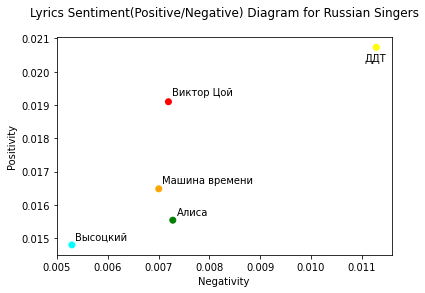

In [6]:
col = ['red', 'green', 'yellow', 'orange', 'cyan']

artists = ['Алиса', 'ДДТ', 'Машина времени', 'Виктор Цой', 'Высоцкий'] # order of printed circles
'''dict_text_coords = {'Алиса':(0.7, 0.1, 'green'), 
                    'ДДТ':(1.5, 1.2, 'yellow'),
                    'Машина времени':(0.3, 0.4, 'orange'),
                    'Виктор Цой':(0.7, 0.97, 'red'),
                    'Высоцкий':(0.7, 0.97, 'cyan')}'''

dict_text_coords = {'Алиса':(1.01, 1.01, 'green'), 
                    'ДДТ':(0.98, 0.98, 'yellow'),
                    'Машина времени':(1.01, 1.01, 'orange'),
                    'Виктор Цой':(1.01, 1.01, 'red'),
                    'Высоцкий':(1.01, 1.01, 'cyan')}

positive_counts = []
neutral_counts  = []
negative_counts = []
totals          = []
text_coords     = []
col             = []


for artist in artists:

    df = df_clean[df_clean.artist == artist]
    total = sum(df.positive.values) + sum(df.neutral.values) + sum(df.negative.values)
    totals.append(total)
    positive_counts.append(sum(df.positive.values)/total)
    neutral_counts.append(sum(df.neutral.values)/total)
    negative_counts.append(sum(df.negative.values)/total)
    col.append(dict_text_coords.get(artist,(0,0,'black'))[2])
    text_coords.append(dict_text_coords.get(artist,(0,0,'black'))[:2])


plt.scatter(x=negative_counts, y=positive_counts, c = col);
#plt.scatter(x=negative_counts, y=positive_counts, s = totals, c = col, alpha = 0.8);

plt.xlabel('Negativity', fontdict = {'fontsize' : 10})
plt.ylabel('Positivity', fontdict = {'fontsize' : 10})
plt.title('Lyrics Sentiment(Positive/Negative) Diagram for Russian Singers\n', fontdict = {'fontsize' : 12})

maxlim = np.max([np.max(negative_counts), np.max(positive_counts)])

#plt.xlim(0, 1.5*maxlim)
#plt.ylim(0, 1.5*maxlim)


for ind, coords in enumerate(text_coords):
    plt.text(coords[0]*negative_counts[ind], coords[1]*positive_counts[ind], artists[ind]);



The closer the circle to the origin the more neutral it is.

## Lyrics Sentiment(Positive/Negative) Diagram for Russian Songs of Viktor Tsoy

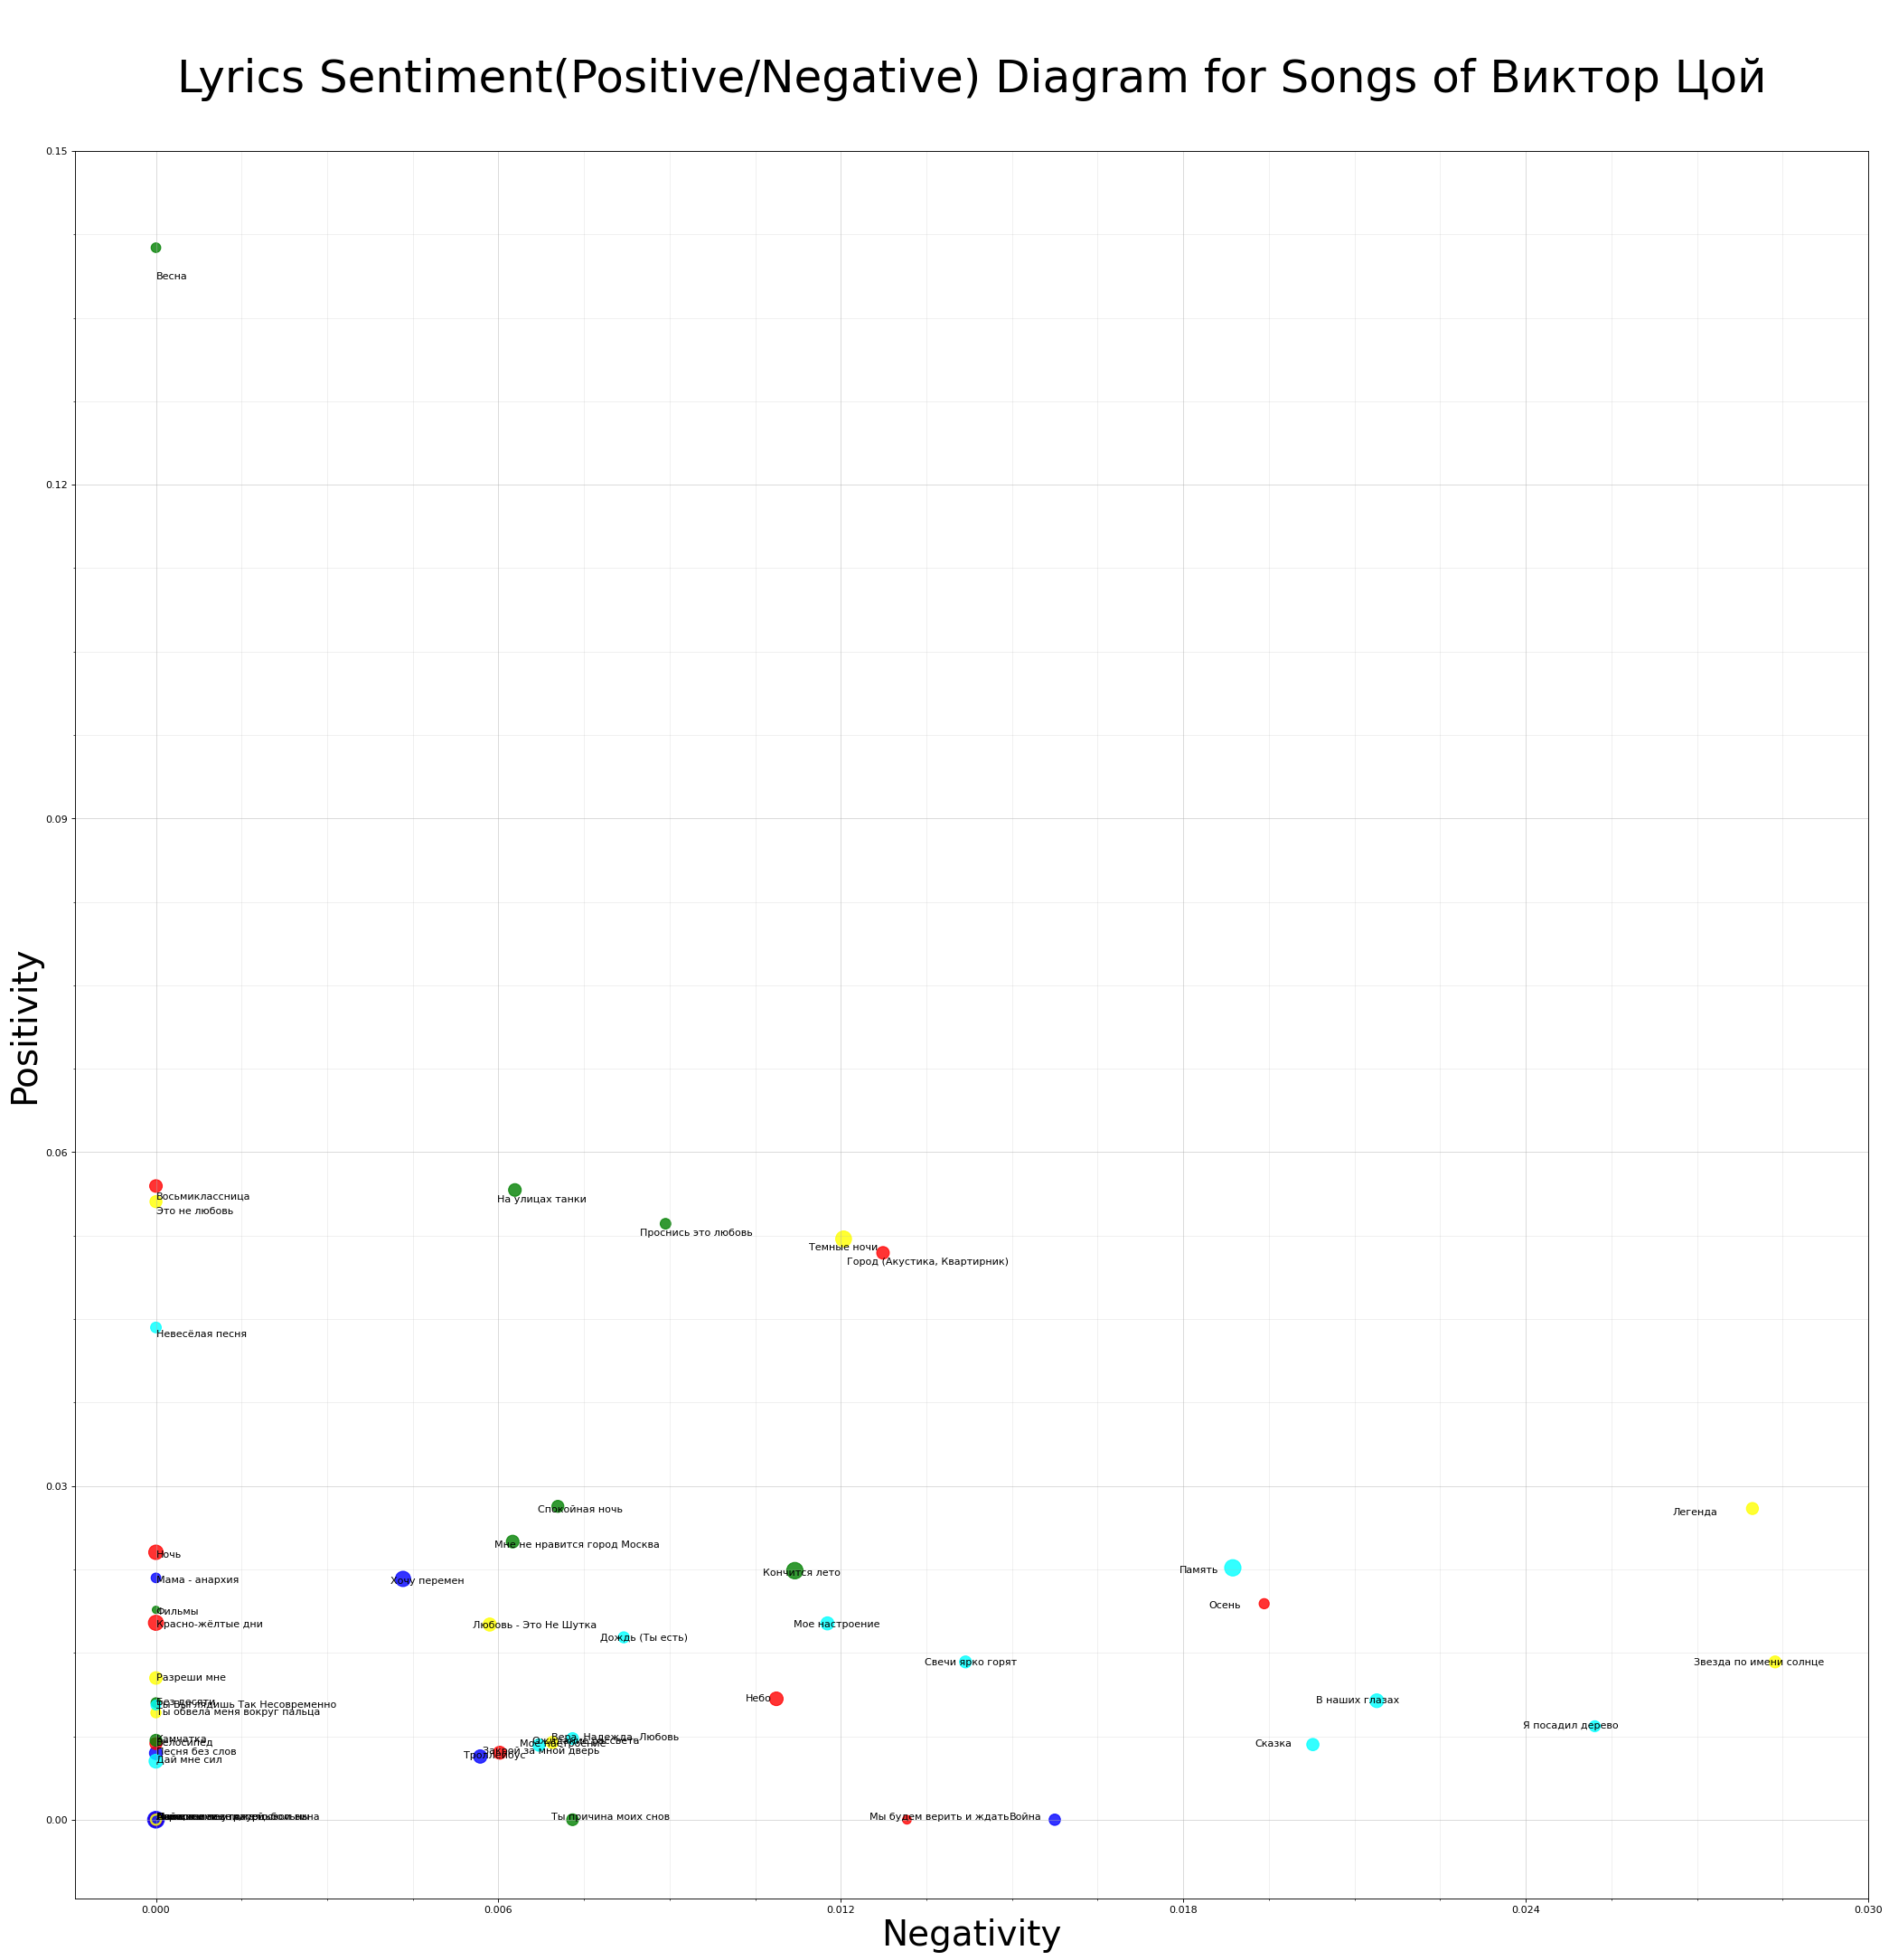

In [15]:
np.random.seed(43)

colors = ['cyan', 'blue', 'green', 'red', 'yellow']

artist = 'Виктор Цой'
#artist = 'Алиса'
#artist = 'ДДТ'
#artist = 'Машина времени'
#artist = 'Высоцкий'

df_artist = df_clean[df_clean.artist == artist]

song_titles = [*zip(df_artist.index.values, df_artist.title.values)]
positive_counts = []
neutral_counts  = []
negative_counts = []
totals          = []

positive_scale = 1
negative_scale = 1

for song_id in df_artist.index:

    song  = df_artist.loc[song_id]
    total = song.positive + song.neutral + song.negative
    totals.append(total)
    
    if total > 0:
        positive_counts.append(positive_scale*song.positive/total)
        neutral_counts.append(song.neutral/total)
        negative_counts.append(negative_scale*song.negative/total)
    else:
        positive_counts.append(0)
        neutral_counts.append(0)
        negative_counts.append(0)

    
col = np.random.choice(colors, size = len(totals))

scale = 4
fig = plt.figure(figsize=(scale*8, scale*8), dpi=80)
ax  = fig.add_subplot(1, 1, 1)


plt.scatter(x=negative_counts, y=positive_counts, s = totals, c = col, alpha = 0.8);

for idx, neg, pos in zip(range(len(positive_counts)), negative_counts, positive_counts):
    plt.text(0.95*neg, 0.98*pos, song_titles[idx][1])


xlim = [s for s in np.arange(0, 1, 0.01) if s>np.max(negative_counts)][0]
ylim = [s for s in np.arange(0, 1, 0.01) if s>np.max(positive_counts)][0]

# Major ticks every 20, minor ticks every 5
major_ticks_x = [xlim/100*t for t in np.arange(0, 101, 20)]
minor_ticks_x = [xlim/100*t for t in np.arange(0, 101, 5) if t%20!=0]
major_ticks_y = [ylim/100*t for t in np.arange(0, 101, 20)]
minor_ticks_y = [ylim/100*t for t in np.arange(0, 101, 5) if t%20!=0]

ax.set_xticks(major_ticks_x)
ax.set_xticks(minor_ticks_x, minor=True)
ax.set_yticks(major_ticks_y)
ax.set_yticks(minor_ticks_y, minor=True)

# And a corresponding grid
ax.minorticks_on()

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

plt.xlabel('Negativity', fontdict = {'fontsize' : 35})
plt.ylabel('Positivity', fontdict = {'fontsize' : 35})
plt.title(f'\nLyrics Sentiment(Positive/Negative) Diagram for Songs of {artist}\n', fontdict = {'fontsize' : 45});

## The Most Positive And Negative Songs

In [16]:
pos_idx = np.argmax(positive_counts)
neg_idx = np.argmax(negative_counts)
print(f"the most positive song: {song_titles[pos_idx][1]}({song_titles[pos_idx][0]}), {positive_counts[pos_idx]}")
print(f"the most negative song: {song_titles[neg_idx][1]}({song_titles[neg_idx][0]}), {negative_counts[neg_idx]}")

the most positive song: Весна(43), 0.14130434782608695
the most negative song: Звезда по имени солнце(0), 0.028368794326241134


In [17]:
idx, title = song_titles[pos_idx][0], song_titles[pos_idx][1]
print(f"the most positive song: {title}, {positive_counts[pos_idx]}")
print(f"{df_artist.loc[idx, 'artist']} - {df_artist.loc[idx, 'title']}\n\n{df_artist.loc[idx, 'lyrics']}")

the most positive song: Весна, 0.14130434782608695
Виктор Цой - Весна


кино (виктор цой) - весна
весна. постоянный насморк.
весна. солнце светит опять.
и я промочил ноги.
весна. я опять иду гулять.
весна. я не могу усидеть дома.
весна. я люблю весну.
о чем поют в моем дворе кошки?
нет, нет, нет, нет, я не усну.
весна. я уже не грею пиво.
весна. скоро вырастет трава.
весна. вы посмотрите, как красиво.
весна. где моя голова?



In [18]:
idx, title = song_titles[neg_idx][0], song_titles[neg_idx][1]
print(f"the most negative song: {title}, {negative_counts[neg_idx]}")
print(f"{df_artist.loc[idx, 'artist']} - {df_artist.loc[idx, 'title']}\n\n{df_artist.loc[idx, 'lyrics']}")

the most negative song: Звезда по имени солнце, 0.028368794326241134
Виктор Цой - Звезда по имени солнце


белый снег, серый лед
на растрескавшейся земле
одеялом лоскутным на ней
город в дорожной петле
а над городом плывут облака
закрывая небесный свет
а над городом желтый дым
городу две тысячи лет
прожитых под светом звезды по имени солнце
и две тысячи лет война -
война без особых причин
война - дело молодых
лекарство против морщин
красная-красная кровь
через час уже просто земля
через два на ней цветы и трава
через три она снова жива
и согрета лучами звезды по имени солнце
и мы знаем, что так было всегда
что судьбою был больше любим, -
кто живет по законам другим
и кому умирать молодым
он не помнит слова "да" и слова "нет"
он не помнит ни чинов ни имен
и способен дотянуться до звезд
не считая что это сон
и упасть опаленный звездой по имени солнце

